In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('brio_vel.csv')
df

,v_actual,v1,v2,v3,v4
0,5,966,1932,3960,7828
1,10,1652,3304,6656,13228
2,15,2912,5848,11784,23301
3,20,3644,7176,14760,29156
4,25,4522,9132,18128,36529
5,30,5342,10752,21552,43294
6,35,6592,13272,26592,53191
7,40,7976,16020,32040,64161


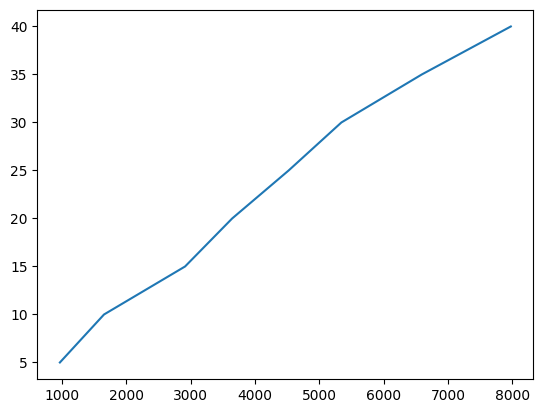

In [8]:
# plot the data
plt.plot(df['v1'], df['v_actual'])
plt.show()

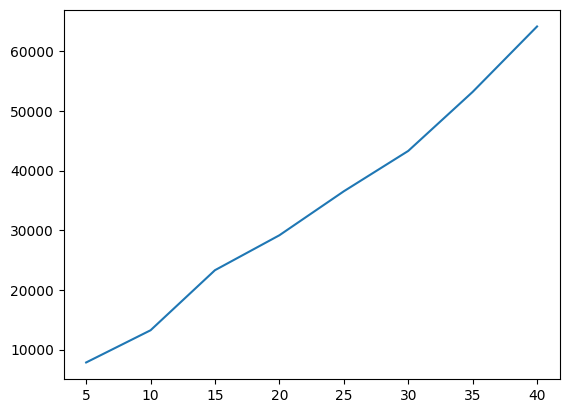

In [4]:
plt.plot(df['v_actual'], df['v4'])

In [6]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.4 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Polynomial Regression Equation:
v_actual = -0.00000016v1² + 0.00650007v1 + -1.15230758
R² score: 0.9960


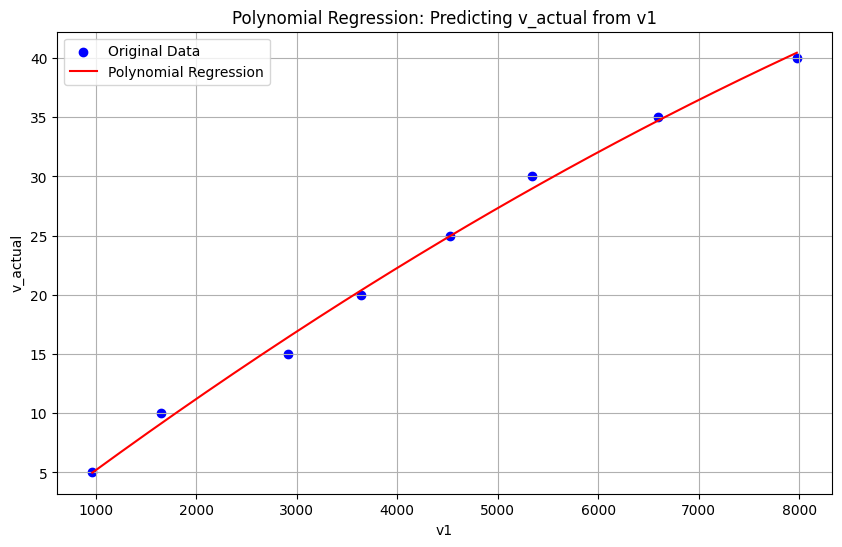


Predictions for some v1 values:
v1 = 1000: predicted v_actual = 5.19
v1 = 3000: predicted v_actual = 16.90
v1 = 5000: predicted v_actual = 27.32
v1 = 7000: predicted v_actual = 36.46


In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data - now v1 is the input (X) and v_actual is what we want to predict (y)
X = df['v1'].values.reshape(-1, 1)
y = df['v_actual'].values

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Calculate R² score
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)

# Print the equation coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Equation:")
print(f"v_actual = {coefficients[2]:.8f}v1² + {coefficients[1]:.8f}v1 + {intercept:.8f}")
print(f"R² score: {r2:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')
X_smooth = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)
plt.plot(X_smooth, y_smooth, color='red', label='Polynomial Regression')
plt.xlabel('v1')
plt.ylabel('v_actual')
plt.title('Polynomial Regression: Predicting v_actual from v1')
plt.legend()
plt.grid(True)
plt.show()

# Example predictions
print("\nPredictions for some v1 values:")
test_values = np.array([[1000], [3000], [5000], [7000]])
test_values_poly = poly_features.transform(test_values)
predictions = model.predict(test_values_poly)

for x, pred in zip(test_values, predictions):
    print(f"v1 = {x[0]}: predicted v_actual = {pred:.2f}")

v_actual = -1.6e-7 * v1² + 6.5e-3 * v1 - 1.15